In [73]:
import sys
print('python: {} \n'.format(sys.version))

import scipy
print('scipy: {}\n'.format(scipy.__version__))

import numpy
print('numpy: {}\n'.format(numpy.__version__))

import matplotlib
print('matplotlib: {} \n'.format(matplotlib.__version__))

import pandas
print('pandas: {} \n'.format(pandas.__version__))

import sklearn
print('sklearn:{} \n'.format(sklearn.__version__))




python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)] 

scipy: 1.1.0

numpy: 1.14.3

matplotlib: 2.2.2 

pandas: 0.23.0 

sklearn:0.19.1 



# 2. Load the Data

In [84]:
#2.1 load  the libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [99]:
#2.2 load the dataset
names = ['sepal_length','sepal_width','petal_length','petal_width','class']
dataset = pandas.read_csv('iris_data.csv',names=names)
dataset.head()

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

# 3. Summarize the Data set

In [100]:
# 3.1 Dimensions of Dataset
print (dataset.shape)

(150, 5)


In [101]:
#3.2 Peek at the Data
print (dataset.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [102]:
#3.3 Statistical Summary
print (dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [103]:
#3.4 Class Distribution
'''Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.'''

'Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.'

In [104]:

2
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 4. Data Visualization

We are going to look at two types of plots:

- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes


4.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

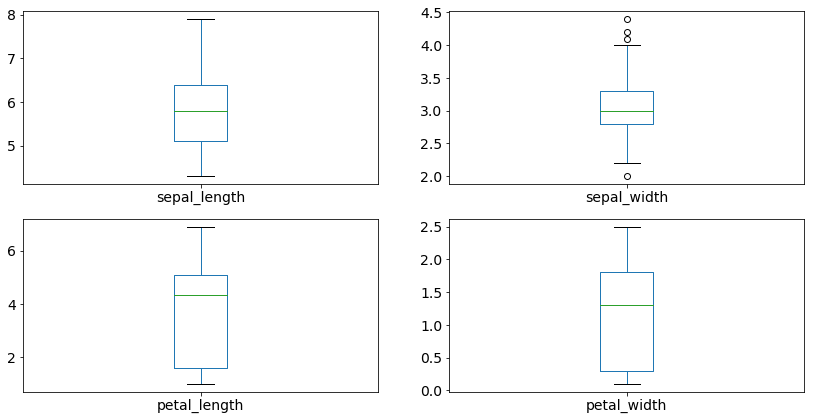

In [105]:

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

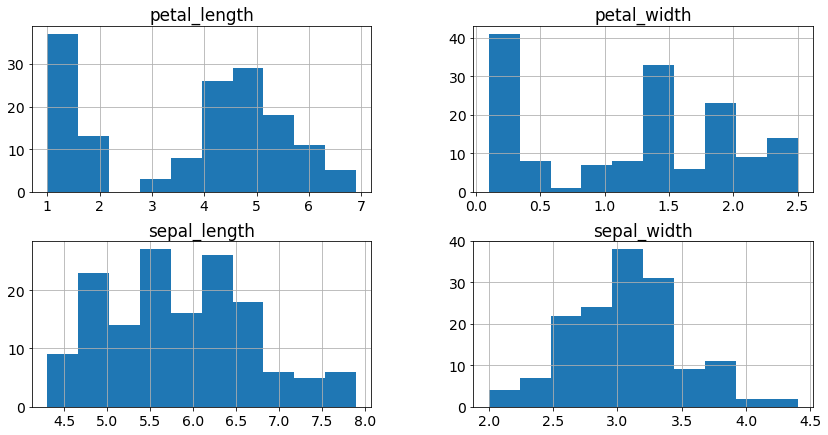

In [107]:
#histograms
dataset.hist()
plt.show()

4.2 Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables

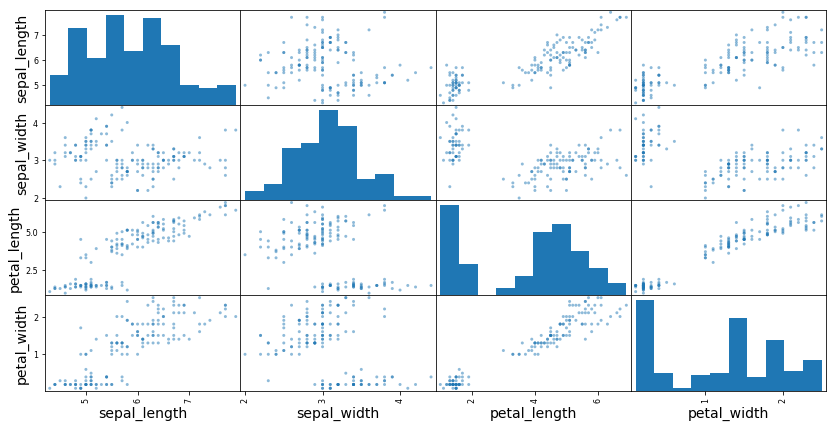

In [110]:
# scatter matrix
scatter_matrix(dataset)
plt.show()

# 5. Evaluate some algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

- Separate out a validation dataset.
- Set-up the test harness to use 10-fold cross validation.
- Build 5 different models to predict species from flower measurements
- Select the best model.

# 5.1 Create a Validation Dataset

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset

In [140]:
# split-out Validation dataset

array =  dataset.values

X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20
seed = 7


X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



# 5.2 Test Harness

We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.




In [141]:
seed = 7
scoring = 'accuracy'

# 5.3 Build Models


We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

- This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. 
- We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. 
- It ensures the results are directly comparable.

In [142]:
#spot check algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [143]:
# Evaluateeach model in turn
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


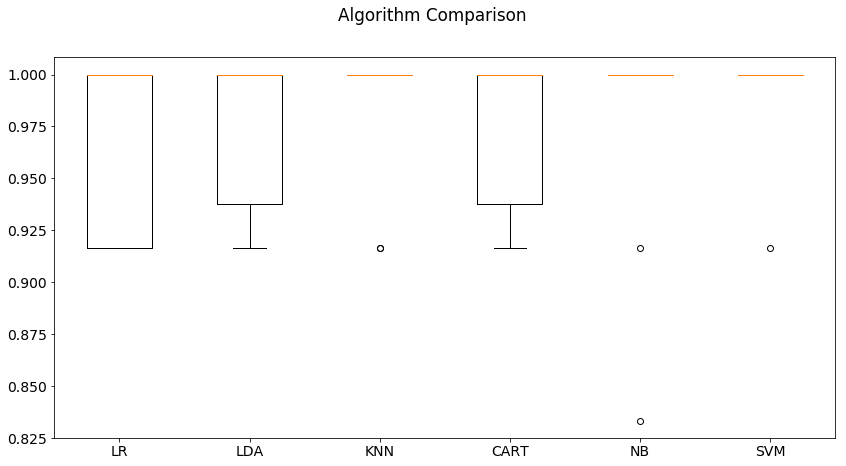

In [144]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



# 6.Make Predictions

The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report

In [146]:
# Make predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

